# <div style="padding:15px;color:white;margin:0;font-size:125%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Importing Libraries</div>

In [480]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# <div style="padding:15px;color:white;margin:0;font-size:125%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Data Overview</div>

make: make of a car (BMW, Toyota, and so on)

model: model of a car

year: year when the car was manufactured

engine_fuel_type: type of fuel the engine needs (diesel, electric, and so on)

engine_hp: horsepower of the engine

engine_cylinders: number of cylinders in the engine

transmission_type: type of transmission (automatic or manual)

driven_wheels: front, rear, all

number_of_doors: number of doors a car has

market_category: luxury, crossover, and so on

vehicle_size: compact, midsize, or large

vehicle_style: sedan or convertible

highway_mpg: miles per gallon (mpg) on the highway

city_mpg: miles per gallon in the city

popularity: number of times the car was mentioned in a Twitter stream

msrp: manufacturer’s suggested retail price

In [389]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# <div style="padding:15px;color:white;margin:0;font-size:125%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Data Cleaning</div>

In [390]:
df.drop(["Number of Doors", "Market Category", "Popularity"], axis=1, inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


In [391]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,vehicle_size,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


In [392]:
df.rename(columns = {'engine_fuel_type' : 'fuel_type', 'engine_hp' : 'hp', 'engine_cylinders' : 'cylinders', 'transmission_type' : 'transmission', 'vehicle_size' : 'size', 'vehicle_style' : 'style', 'msrp' : 'price'}, inplace = True)
df.head()

,make,model,year,fuel_type,hp,cylinders,transmission,driven_wheels,size,style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           11914 non-null  object 
 1   model          11914 non-null  object 
 2   year           11914 non-null  int64  
 3   fuel_type      11911 non-null  object 
 4   hp             11845 non-null  float64
 5   cylinders      11884 non-null  float64
 6   transmission   11914 non-null  object 
 7   driven_wheels  11914 non-null  object 
 8   size           11914 non-null  object 
 9   style          11914 non-null  object 
 10  highway_mpg    11914 non-null  int64  
 11  city_mpg       11914 non-null  int64  
 12  price          11914 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 1.2+ MB


In [394]:
df.describe()

,year,hp,cylinders,highway_mpg,city_mpg,price
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,26.637485,19.733255,4.059474e+04
std,7.579740,109.19187,1.780559,8.863001,8.987798,6.010910e+04
min,1990.000000,55.00000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,354.000000,137.000000,2.065902e+06


In [395]:
df.isnull().sum()

make              0
model             0
year              0
fuel_type         3
hp               69
cylinders        30
transmission      0
driven_wheels     0
size              0
style             0
highway_mpg       0
city_mpg          0
price             0
dtype: int64

In [396]:
df['fuel_type'] = df['fuel_type'].fillna('regular unleaded')
imputer = KNNImputer(n_neighbors=5)
null_col = ["hp", "cylinders"]
df[null_col] = imputer.fit_transform(df[null_col])

In [397]:
df.isnull().sum()

make             0
model            0
year             0
fuel_type        0
hp               0
cylinders        0
transmission     0
driven_wheels    0
size             0
style            0
highway_mpg      0
city_mpg         0
price            0
dtype: int64

In [398]:
df.duplicated().sum()

721

In [399]:
df.drop_duplicates(inplace=True)

In [400]:
df.shape

(11193, 13)

# <div style="padding:15px;color:white;margin:0;font-size:125%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Handling Outliers</div>

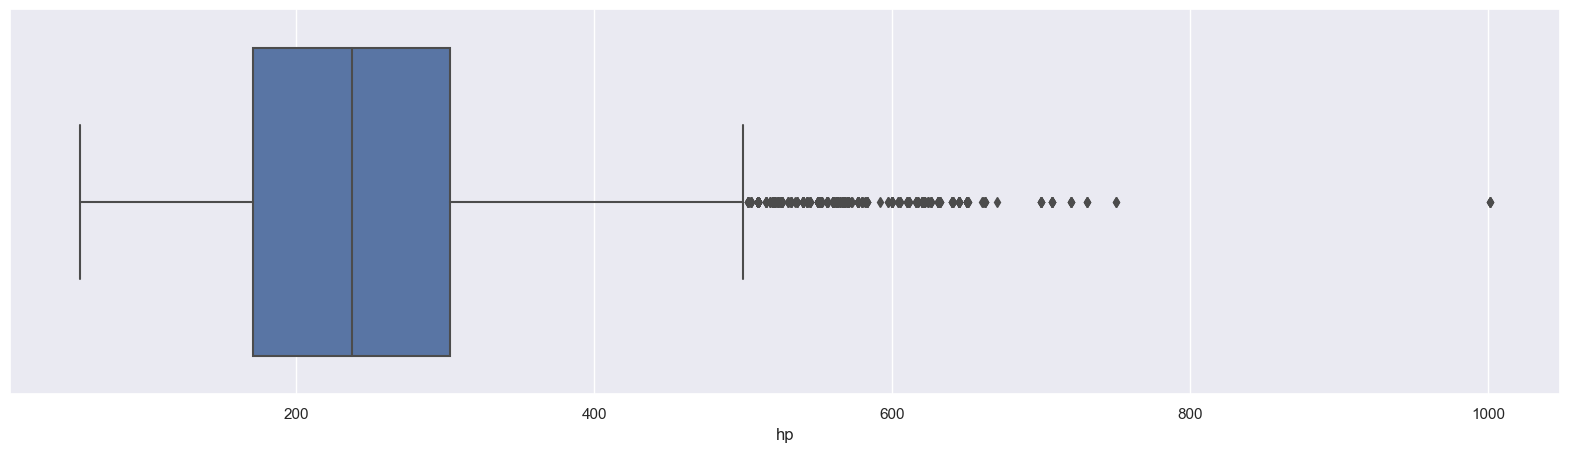

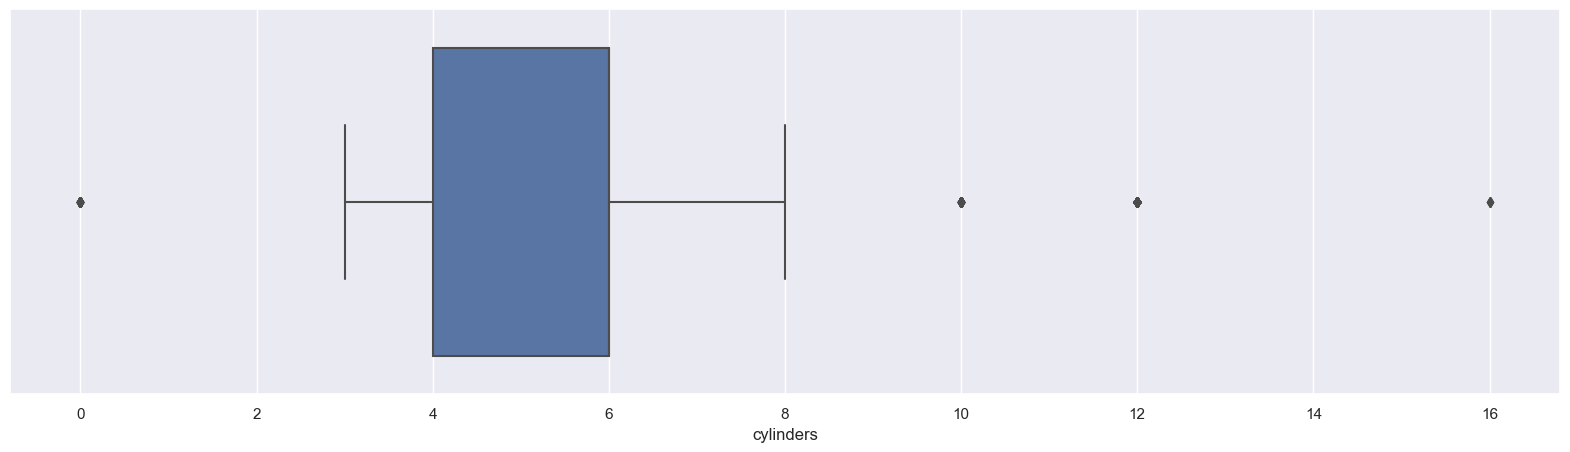

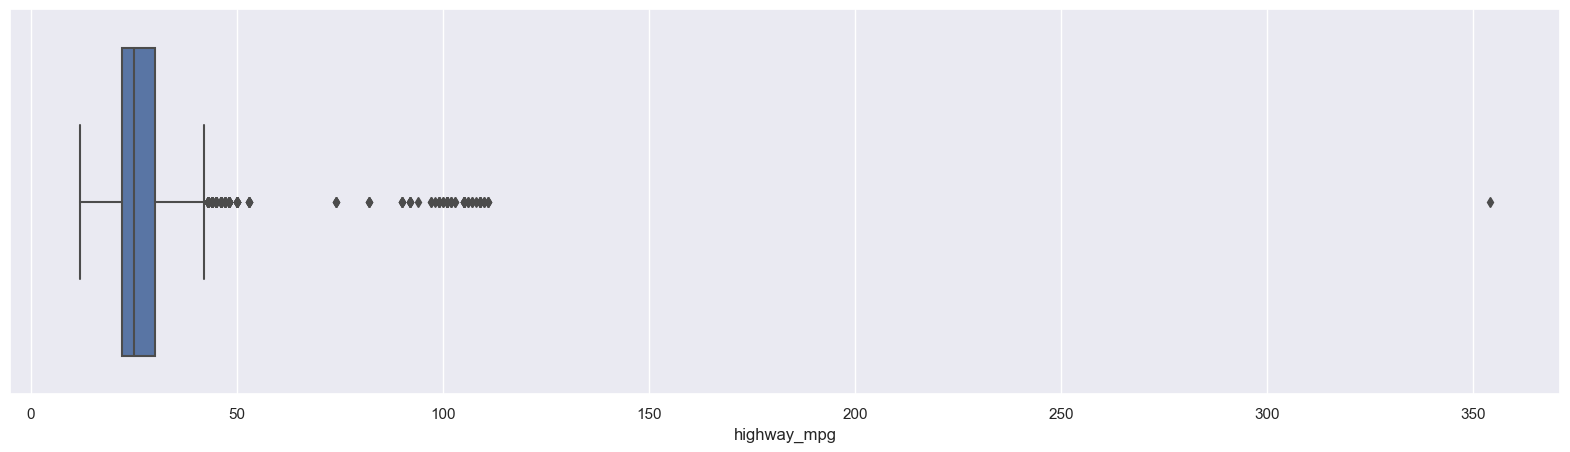

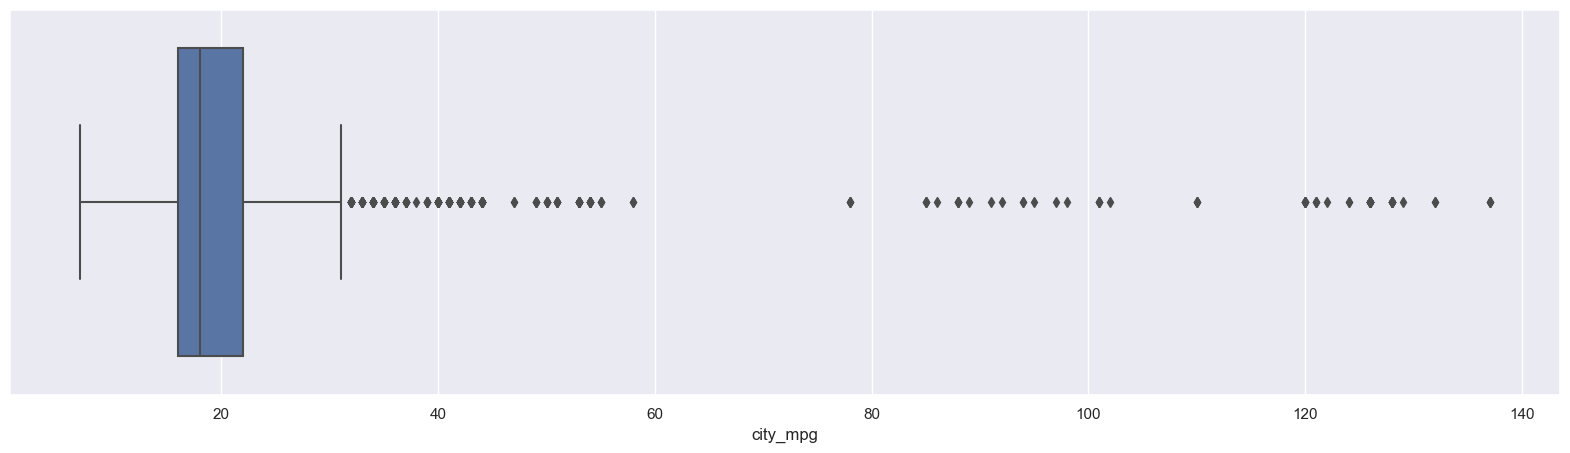

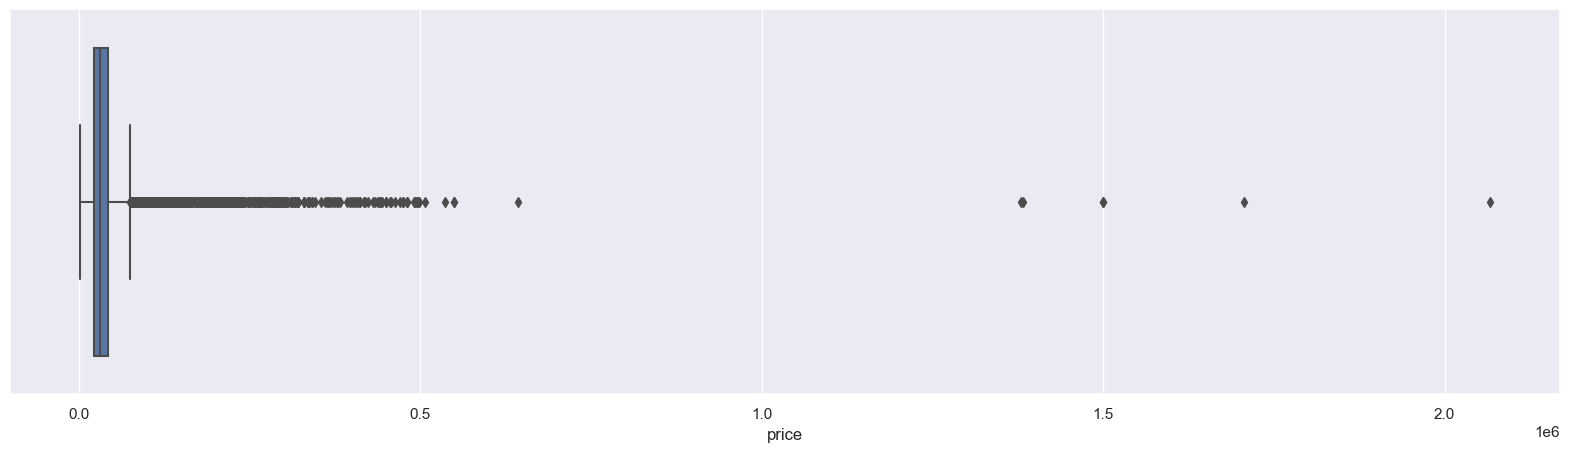

In [401]:
num_col = df[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'price']]
for col in num_col:
    sns.boxplot(x=num_col[col])
    plt.show()

In [402]:
for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df.drop(df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)].index, inplace=True)

In [403]:
df.describe()

,year,hp,cylinders,highway_mpg,city_mpg,price
count,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000
mean,2010.290405,231.549669,5.424207,26.291934,19.170287,29159.671051
std,7.472370,77.827065,1.393987,5.743845,4.375637,15595.795276
min,1990.000000,63.000000,3.000000,12.000000,10.000000,2000.000000
25%,2006.000000,170.000000,4.000000,22.000000,16.000000,20475.000000
50%,2014.000000,220.000000,6.000000,26.000000,18.000000,29065.000000
75%,2016.000000,287.000000,6.000000,30.000000,22.000000,38782.500000
max,2017.000000,485.000000,8.000000,42.000000,31.000000,70850.000000


In [404]:
df.head()

,make,model,year,fuel_type,hp,cylinders,transmission,driven_wheels,size,style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


# <div style="padding:15px;color:white;margin:0;font-size:125%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Data Visualization</div>

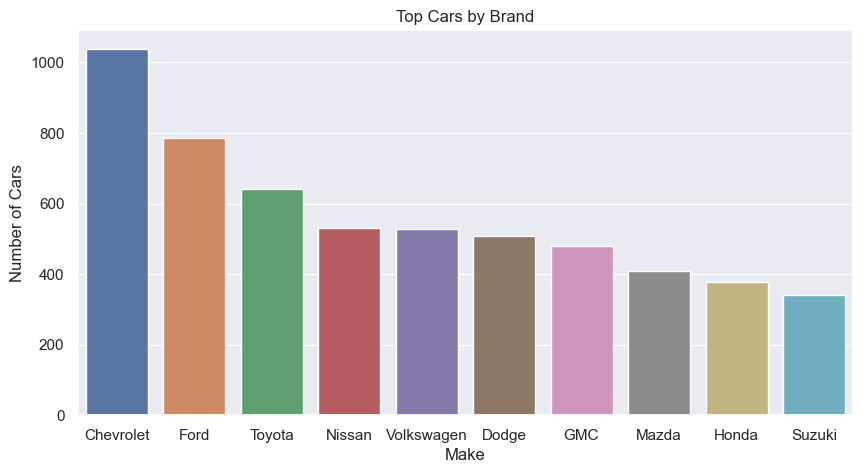

In [405]:
plt.figure(figsize=(10,5))
top_counts = df["make"].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=top_counts.index, y=top_counts.values)
plt.title("Top Cars by Brand")
plt.xlabel("Make")
plt.ylabel("Number of Cars")
plt.show()

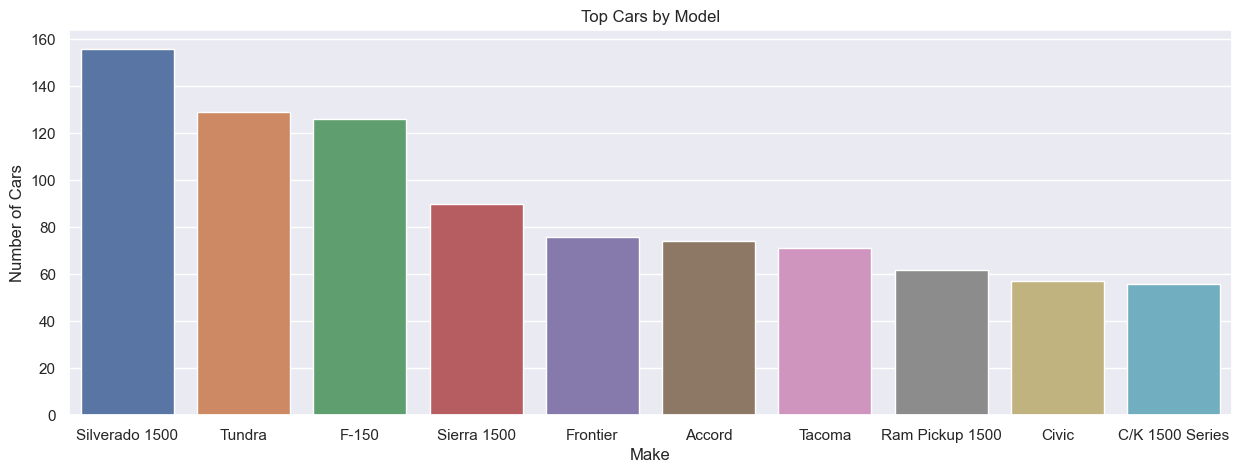

In [406]:
plt.figure(figsize=(15,5))
top_models = df["model"].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=top_models.index, y=top_models.values)
plt.title("Top Cars by Model")
plt.xlabel("Make")
plt.ylabel("Number of Cars")
plt.show()

Text(0.5, 1.0, 'Counts of Cars Sold by Year')

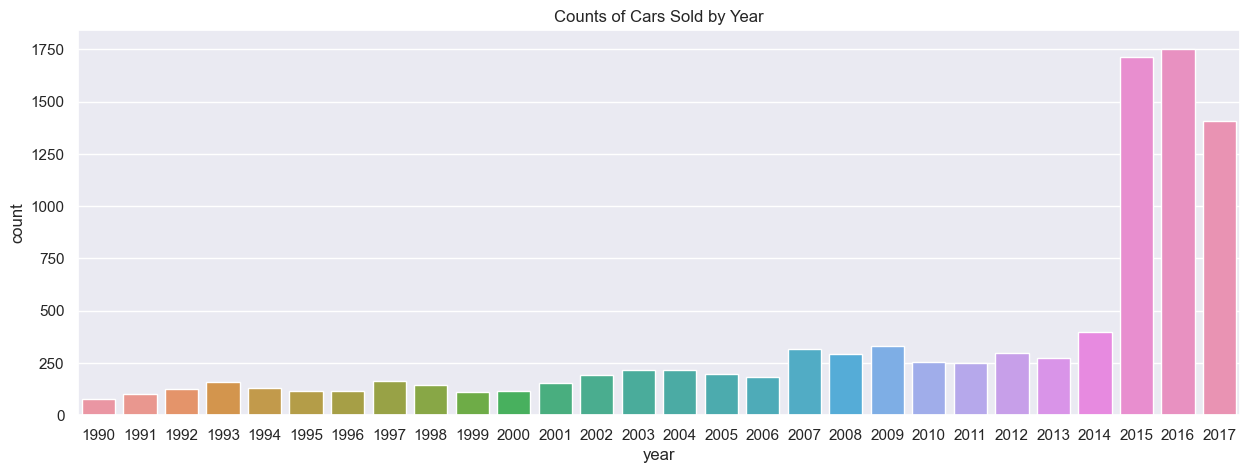

In [407]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["year"])
plt.title("Counts of Cars Sold by Year")

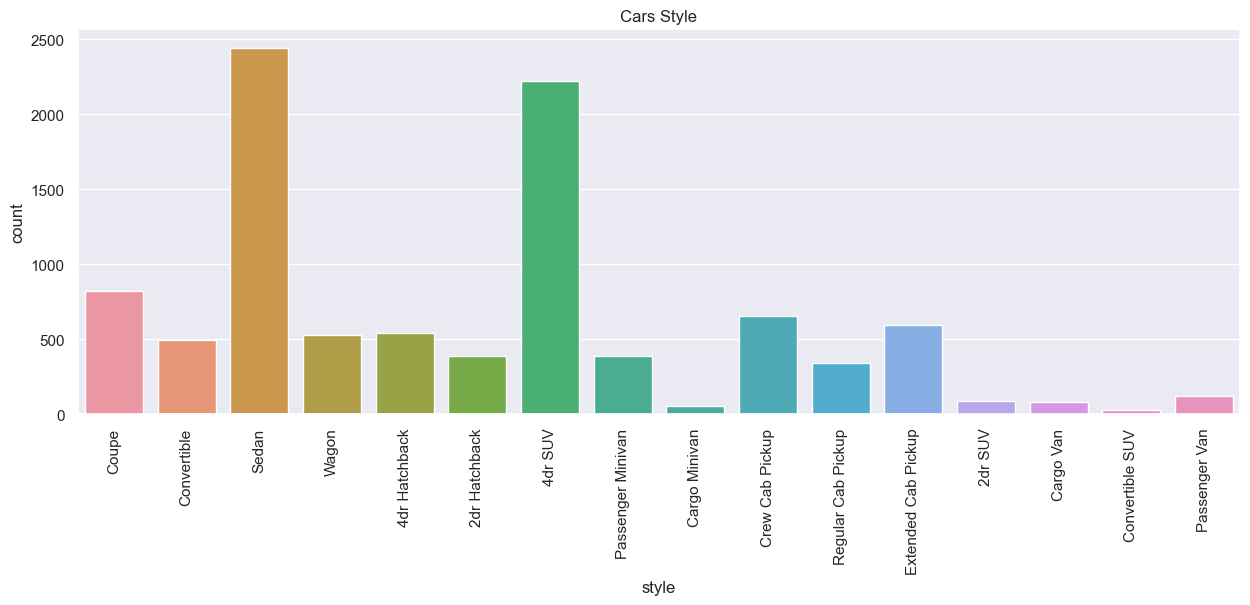

In [408]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["style"])
plt.xticks(rotation='vertical')
plt.title("Cars Style")
plt.show()

<AxesSubplot:xlabel='cylinders', ylabel='count'>

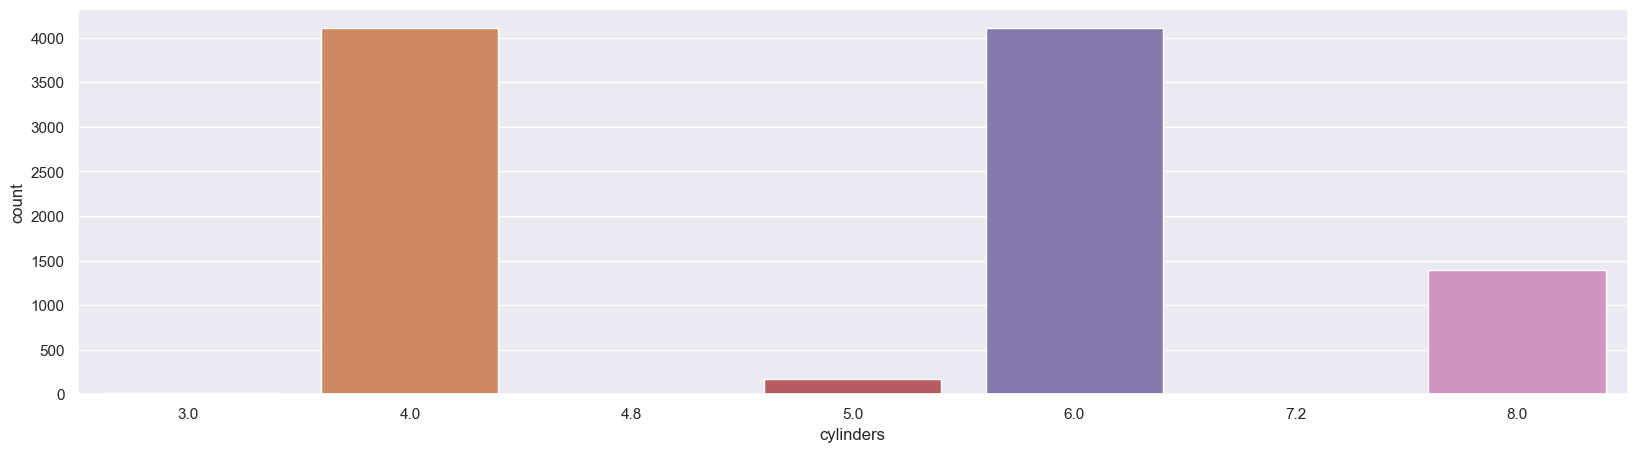

In [409]:
sns.countplot(x=df["cylinders"])

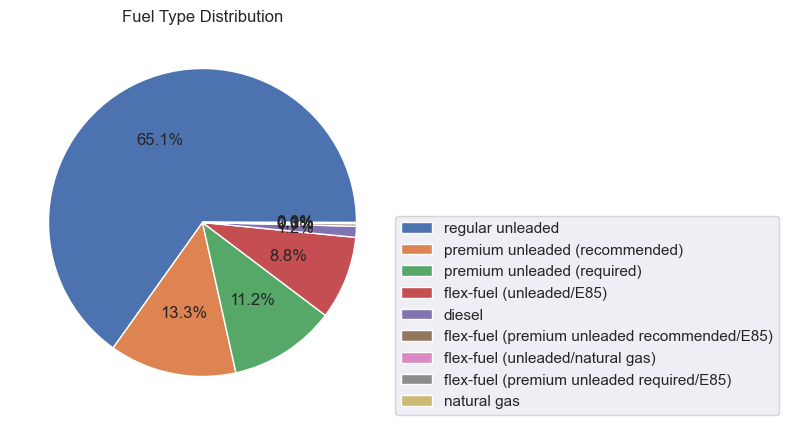

In [410]:
fuel_counts = df['fuel_type'].value_counts()
plt.pie(fuel_counts, labels=None, autopct='%1.1f%%')
plt.title('Fuel Type Distribution')
plt.legend(fuel_counts.index, loc=(1,0))
plt.show()

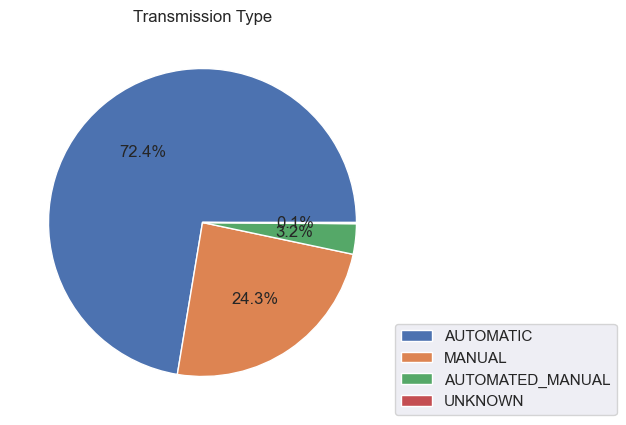

In [411]:
transmission_count = df["transmission"].value_counts()
plt.pie(transmission_count, autopct='%1.1f%%')
plt.title('Transmission Type')
plt.legend(transmission_count.index, loc=(1,0))
plt.show()

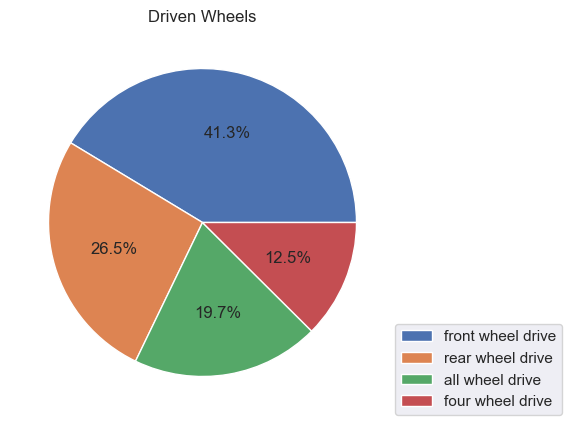

In [412]:
wheels_count = df["driven_wheels"].value_counts()
plt.pie(wheels_count, autopct='%1.1f%%')
plt.title('Driven Wheels')
plt.legend(wheels_count.index, loc=(1,0))
plt.show()

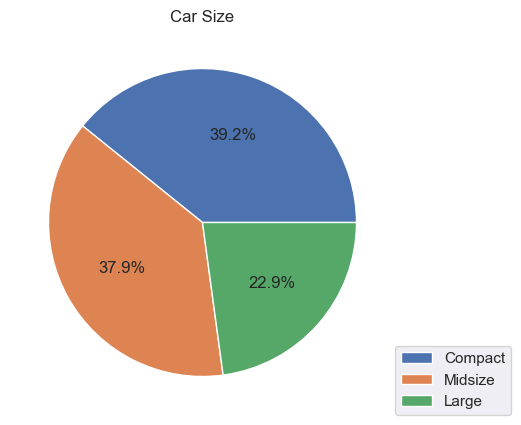

In [413]:
size_count = df["size"].value_counts()
plt.pie(size_count, autopct='%1.1f%%')
plt.title('Car Size')
plt.legend(size_count.index, loc=(1,0))
plt.show()

Text(0.5, 1.0, 'Distribution of Prices')

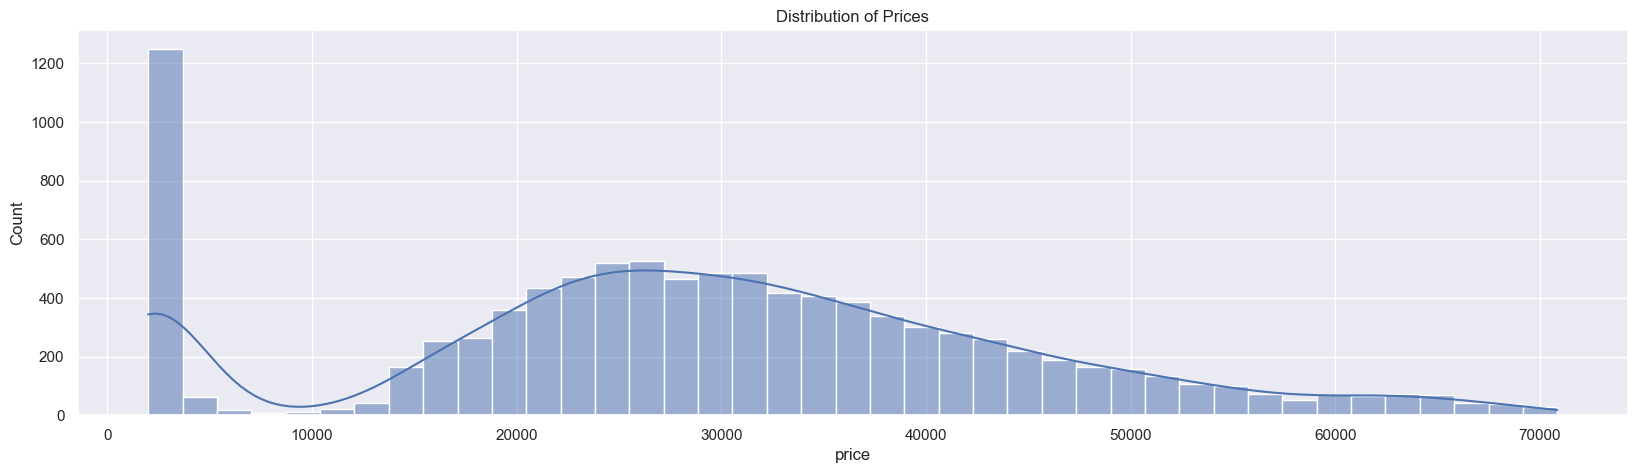

In [416]:
sns.histplot(x=df["price"], kde=True)
plt.title('Distribution of Prices')

Text(0.5, 1.0, 'Distribution of prices after log tranformation')

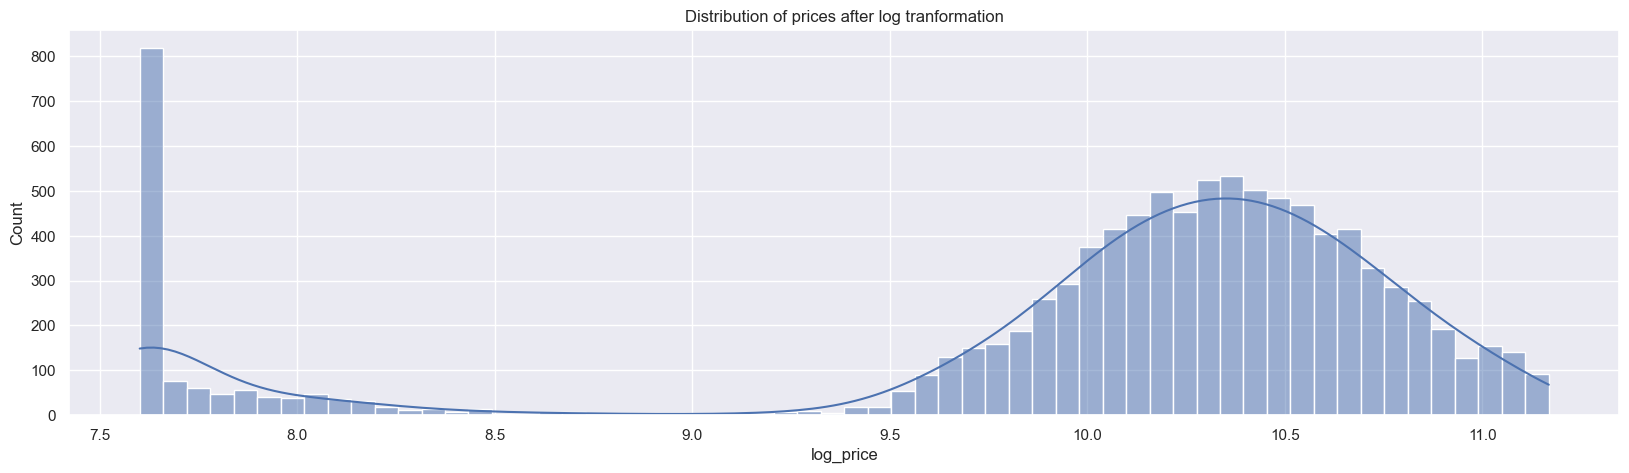

In [422]:
df['log_price'] = np.log1p(df['price'])
sns.histplot(df["log_price"], kde=True)
plt.title('Distribution of prices after log tranformation')

Text(0.5, 1.0, 'Distribution of prices after sqrt tranformation')

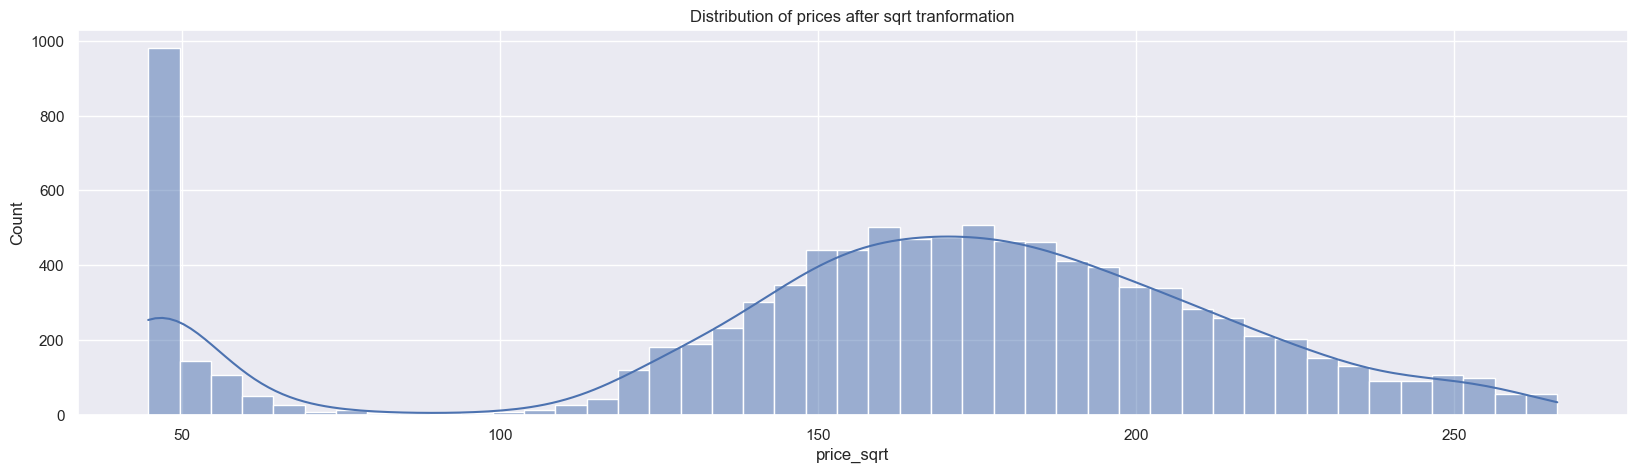

In [419]:
df['price_sqrt'] = np.sqrt(df['price'])
sns.histplot(df["price_sqrt"], kde=True)
plt.title('Distribution of prices after sqrt tranformation')

#### How does the fuel type affect the highway and city mileage of the cars?

C:\Users\MOH\AppData\Local\Temp\ipykernel_8996\2423087754.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fuel_mileage = df.groupby('fuel_type')['highway_mpg', 'city_mpg'].mean()


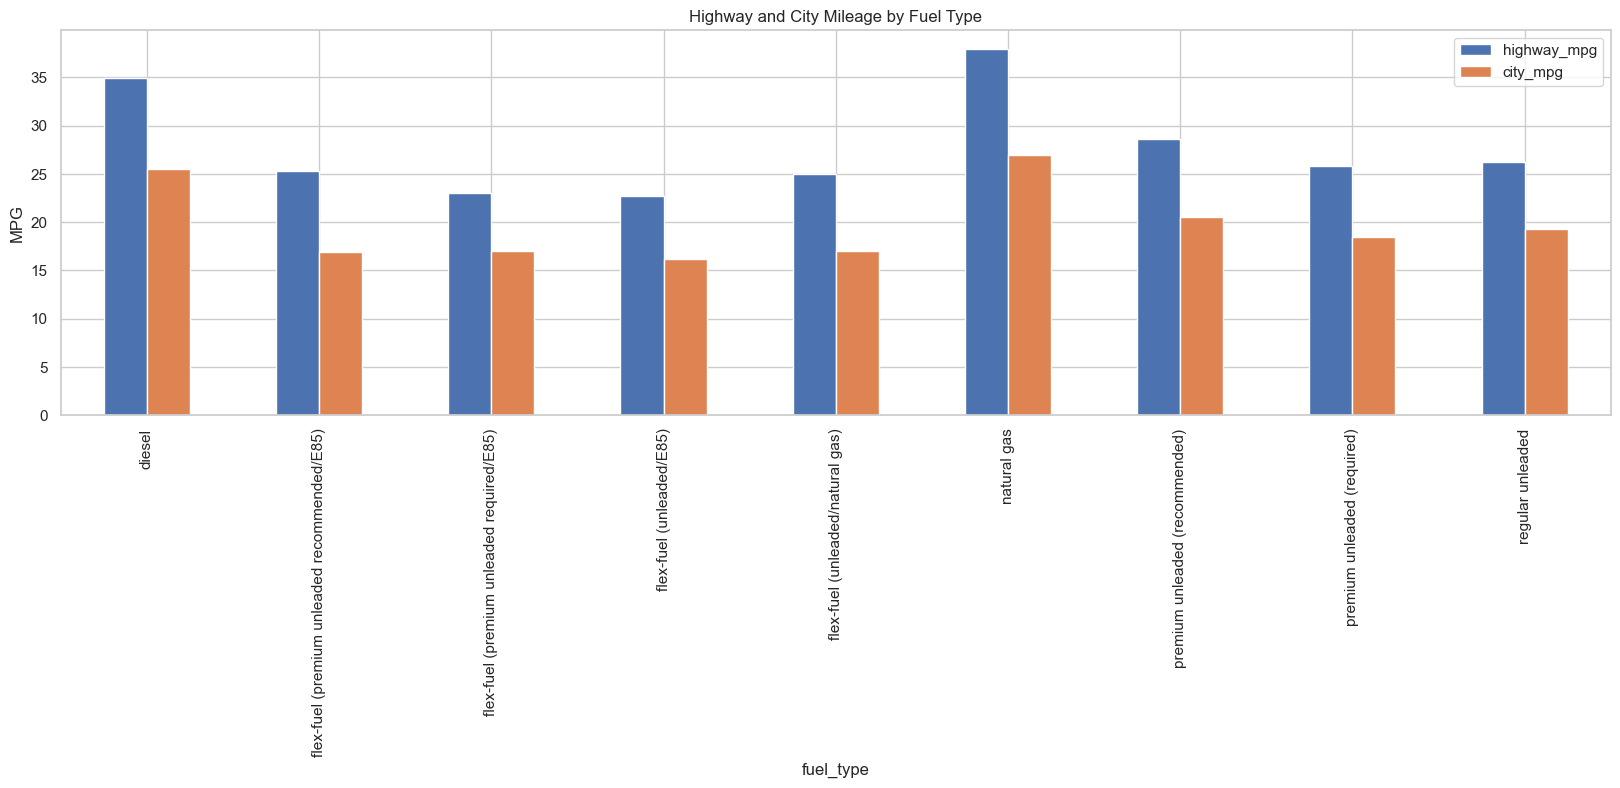

In [384]:
fuel_mileage = df.groupby('fuel_type')['highway_mpg', 'city_mpg'].mean()
fuel_mileage.plot(kind='bar')
plt.title('Highway and City Mileage by Fuel Type')
plt.ylabel('MPG')
plt.xticks(rotation="vertical")
plt.show()

### How does the transmission type affect the highway and city mileage of the cars?

C:\Users\MOH\AppData\Local\Temp\ipykernel_8996\3389567186.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t_mileage = df.groupby('transmission')['highway_mpg', 'city_mpg'].mean()


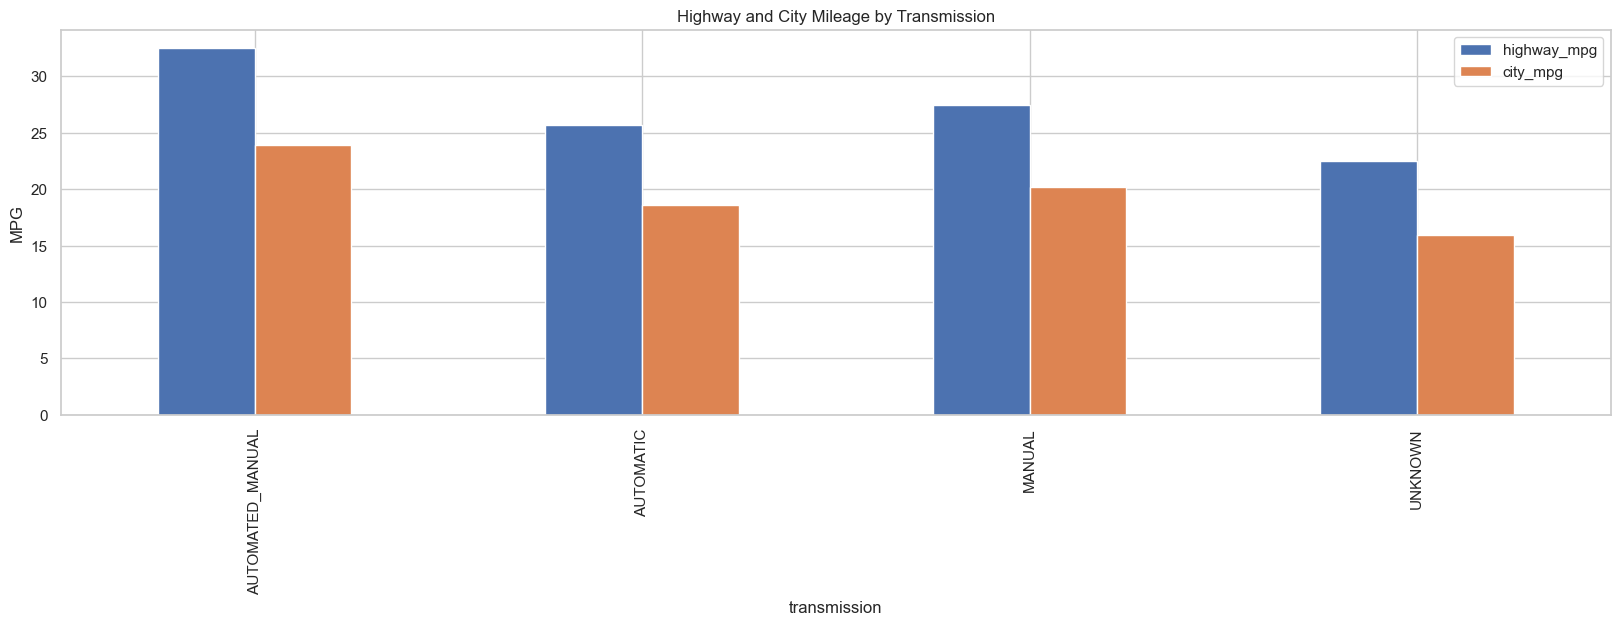

In [387]:
t_mileage = df.groupby('transmission')['highway_mpg', 'city_mpg'].mean()
t_mileage.plot(kind='bar')
plt.title('Highway and City Mileage by Transmission')
plt.ylabel('MPG')
plt.show()

#### What is the relation between the price and number of cylinders?

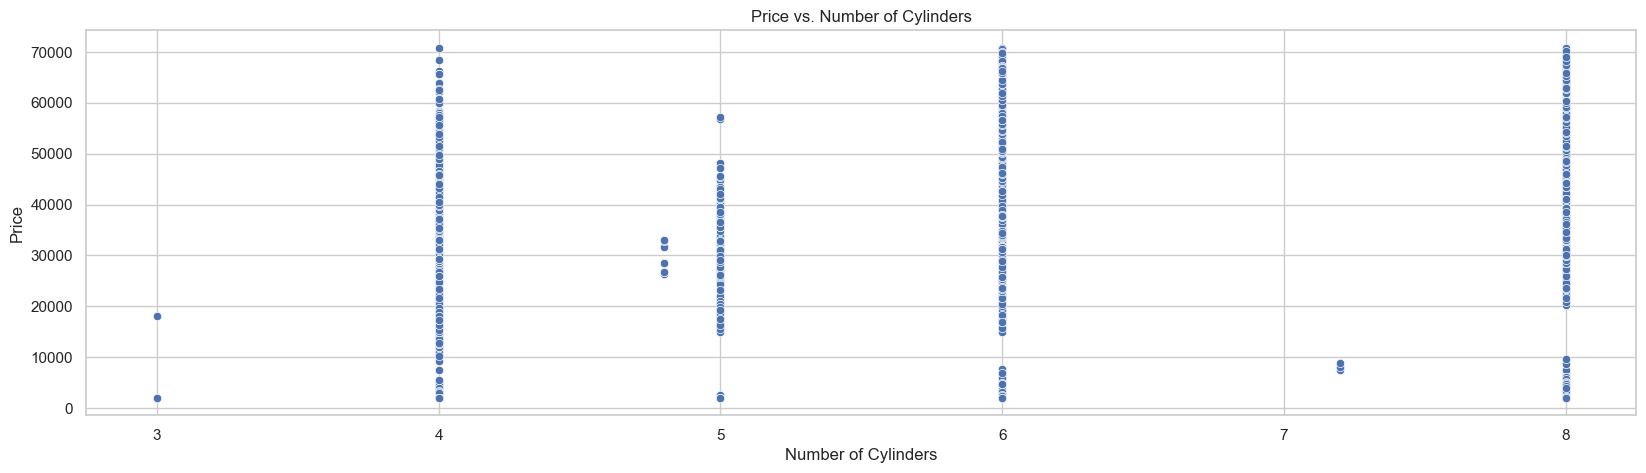

In [374]:
sns.scatterplot(x='cylinders', y='price', data=df)
plt.title('Price vs. Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.show()

#### What is the relation between the horsepower and the price?

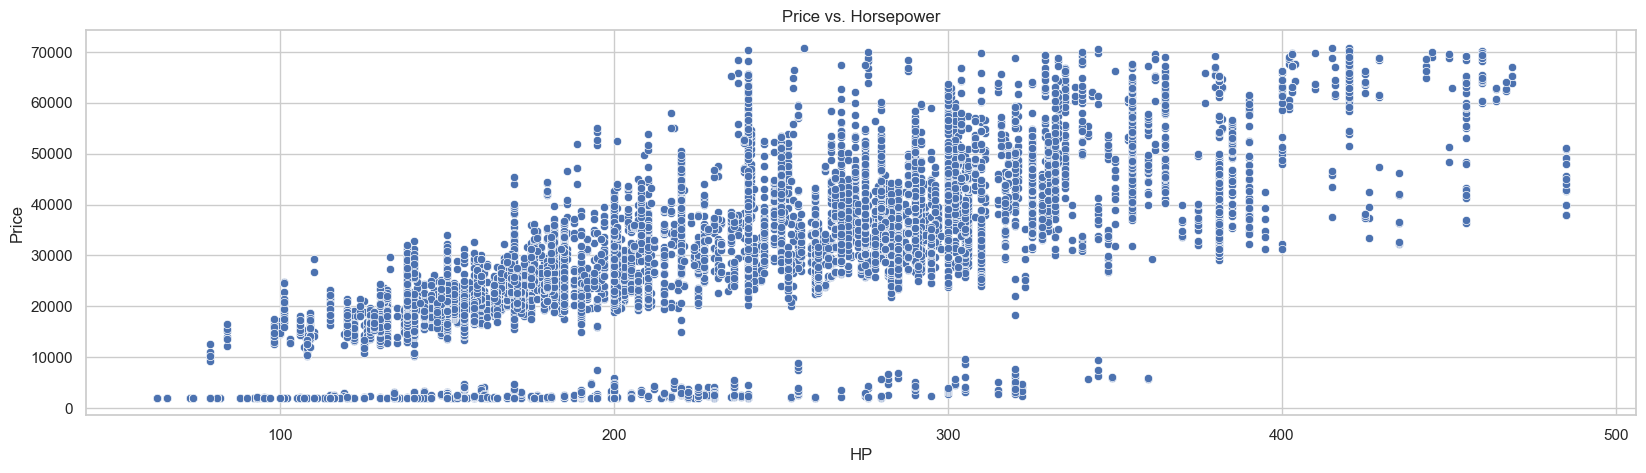

In [372]:
sns.scatterplot(x='hp', y='price', data=df)
plt.title('Price vs. Horsepower')
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()

#### What is the relation between the price and transmission?

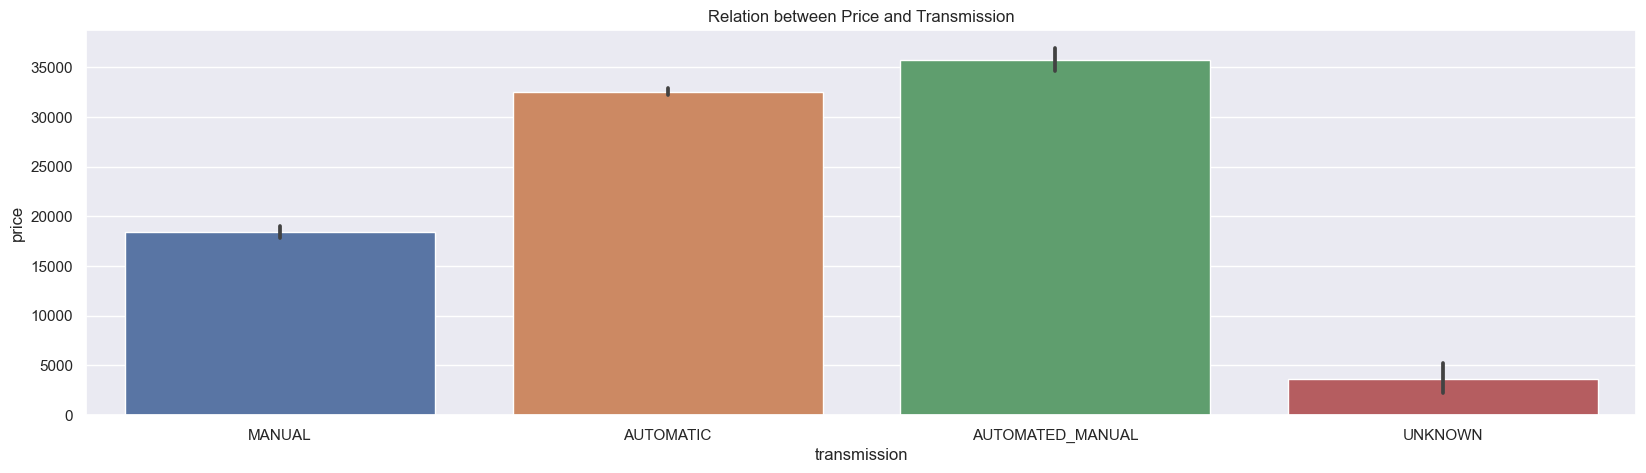

In [347]:
sns.barplot(x="transmission", y="price", data=df)
plt.title("Relation between Price and Transmission")
plt.show()

#### What is the relation between the price and fuel type?

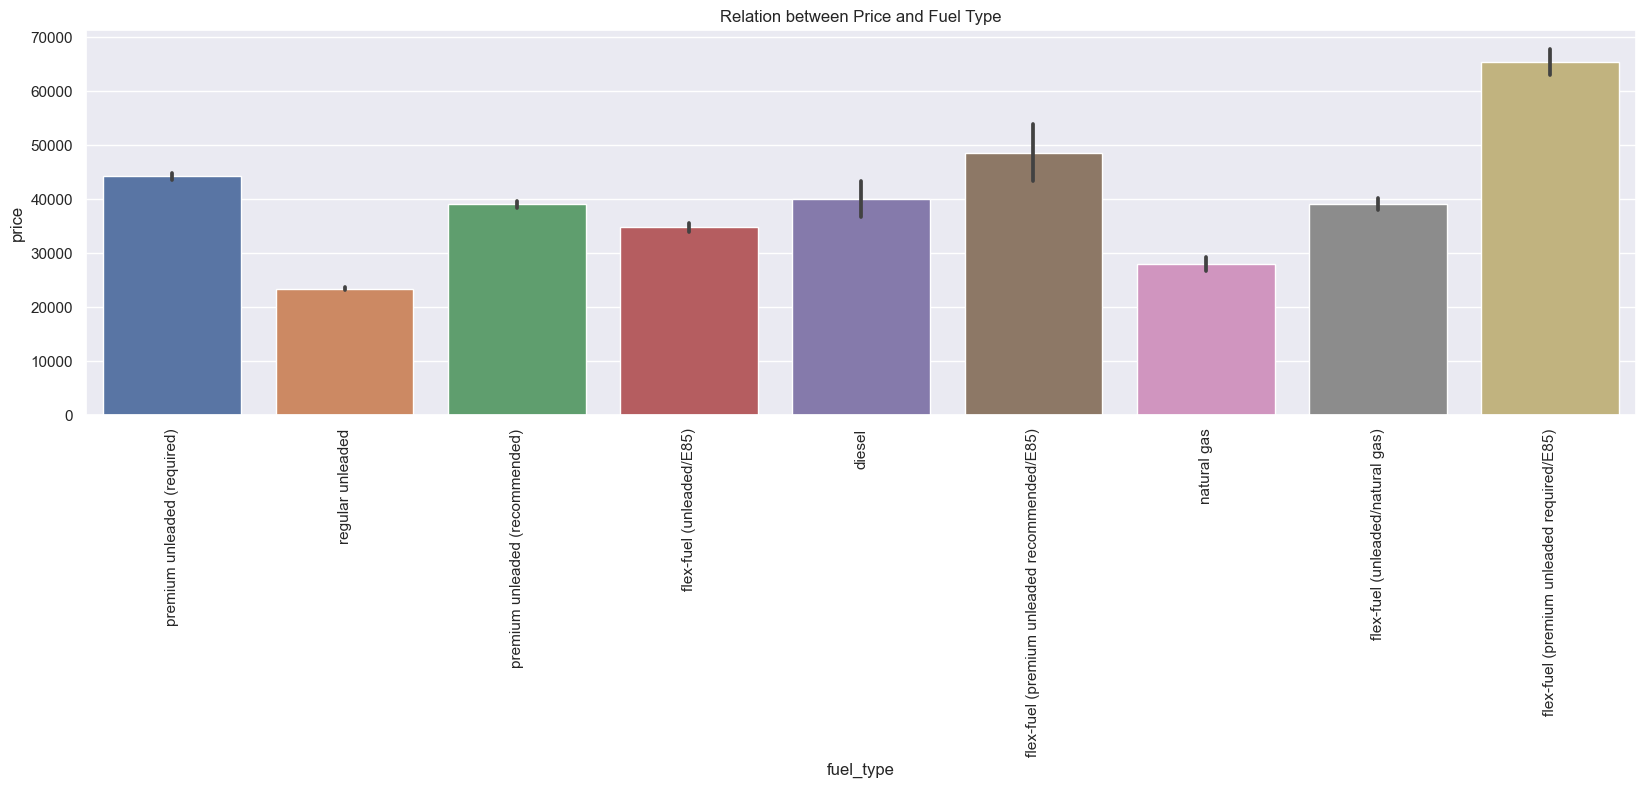

In [352]:
sns.barplot(x="fuel_type", y="price", data=df)
plt.title("Relation between Price and Fuel Type")
plt.xticks(rotation="vertical")
plt.show()

#### What is the relation between the price and driven wheels?

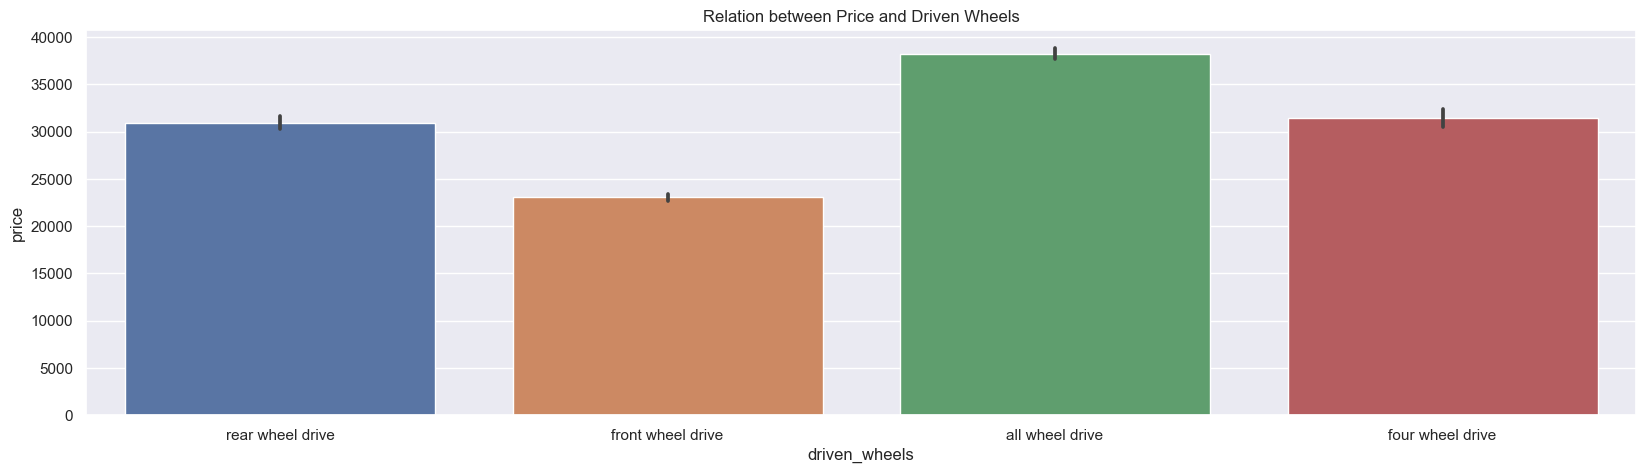

In [353]:
sns.barplot(x="driven_wheels", y="price", data=df)
plt.title("Relation between Price and Driven Wheels")
plt.show()

#### What is the relation between the price and size?

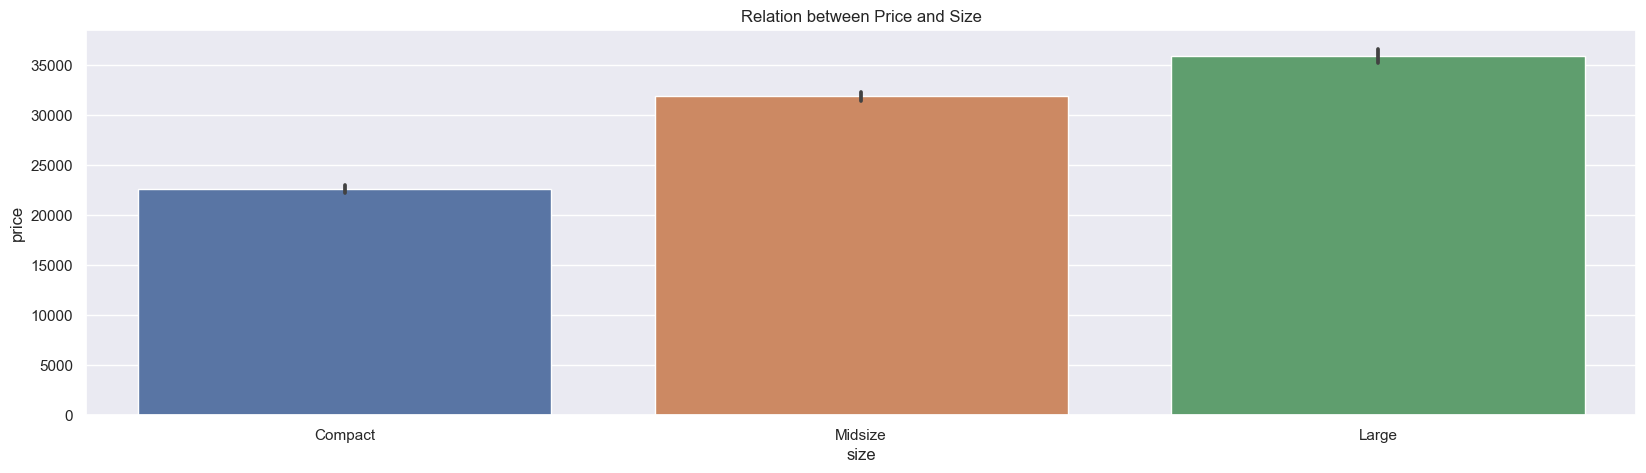

In [356]:
sns.barplot(x="size", y="price", data=df)
plt.title("Relation between Price and Size")
plt.show()

#### What is the relation between engine horsepower and fuel efficiency?

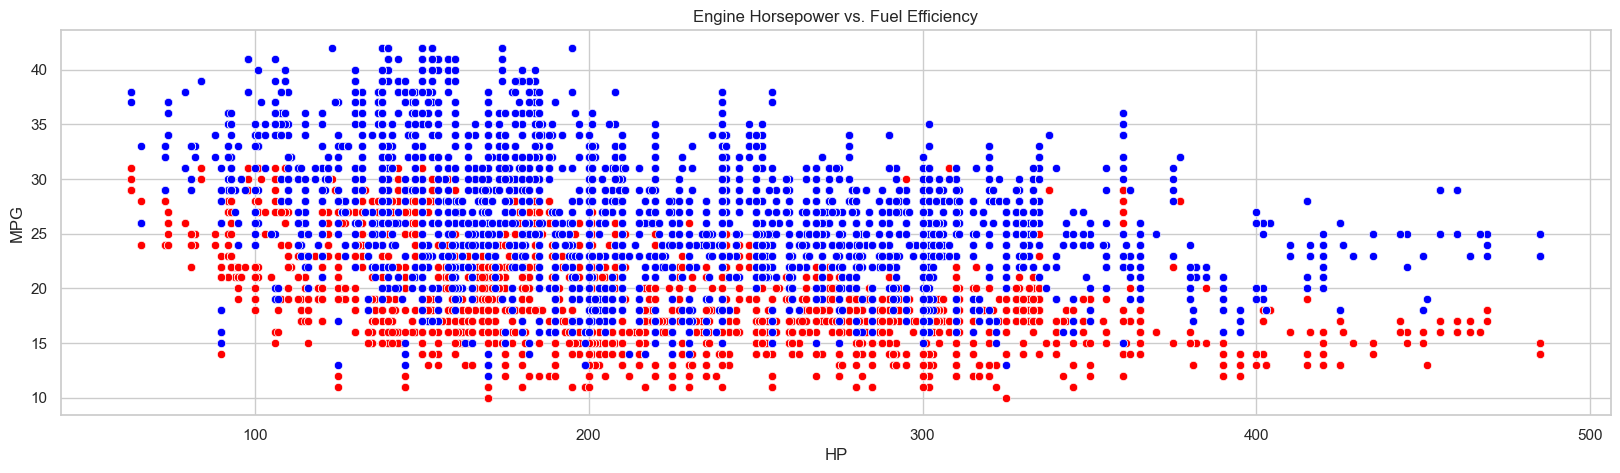

In [366]:
sns.scatterplot(x='hp', y='city_mpg', data=df, color='red')
sns.scatterplot(x='hp', y='highway_mpg', data=df, color='blue')
plt.title('Engine Horsepower vs. Fuel Efficiency')
plt.xlabel('HP')
plt.ylabel('MPG')
plt.show()

# <div style="padding:15px;color:white;margin:0;font-size:125%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Data Preprocessing</div>

In [446]:
df2 = df.copy()

In [447]:
def label_encode_dataframe(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col].astype(str))
    return df

In [448]:
df2 = label_encode_dataframe(df2)

In [449]:
df2.drop(["log_price", "price"], axis=1, inplace=True)
df2 = shuffle(df2)
df2.head()

,make,model,year,fuel_type,hp,cylinders,transmission,driven_wheels,size,style,highway_mpg,city_mpg,price_sqrt
2226,35,148,2007,8,155.0,4.0,1,2,2,8,31,22,151.756384
592,9,35,2017,8,180.0,4.0,1,0,0,3,29,21,164.423234
2491,8,163,2016,6,485.0,8.0,1,3,1,14,25,15,199.987500
7134,23,425,1997,8,114.0,4.0,2,2,0,8,31,23,44.721360
1373,2,736,2004,8,250.0,6.0,1,0,2,15,20,15,199.874961


In [450]:
X = df2.drop("price_sqrt", axis = 1)
y = df2["price_sqrt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [451]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# <div style="padding:15px;color:white;margin:0;font-size:125%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">Modeling</div>

In [479]:
models = [LinearRegression(),
          KNeighborsRegressor(),
          DecisionTreeRegressor(),
          RandomForestRegressor()]

results = []

for model in models:
    model_name = type(model).__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append([model_name, train_score, test_score, mae, mse])

result = pd.DataFrame(results, columns=['Model', 'Train Score', 'Test Score', 'MAE', 'MSE'])
result

,Model,Train Score,Test Score,MAE,MSE
0,LinearRegression,0.777416,0.773838,20.116538,669.840301
1,KNeighborsRegressor,0.952594,0.915001,9.454424,251.749142
2,DecisionTreeRegressor,0.990349,0.936674,8.486908,187.558080
3,RandomForestRegressor,0.989267,0.966493,6.949969,99.241423
